<font size=6><b>Bike Share Demand
* ref: https://www.kaggle.com/competitions/bike-sharing-demand/data

<font size=4><b>Data Fields
<pre>
* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
            2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
            3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
            4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

# Data Load
* parse_dates=['datetime']

* <b>구조확인 (3종)
1) head()
2) info()
3) shape

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train = pd.read_csv('./datasets/train.csv', parse_dates=['datetime'])
test = pd.read_csv('.//datasets/test.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [4]:
train.shape

(10886, 12)

## 컬럼명 변경

In [5]:
# datetime 이름 예약어, 변경
train.rename(columns = {'datetime' : 'regdate', 'count' : 'regcount'}, inplace = True)
train.columns

Index(['regdate', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'regcount'],
      dtype='object')

In [6]:
test.rename(columns = {'datetime' : 'regdate'}, inplace = True)
test.columns

Index(['regdate', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

## 결측 체크
* 결측 없음

In [7]:
train.isna().sum()

regdate       0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
regcount      0
dtype: int64

## object 체크
* object type 없음

In [8]:
train.select_dtypes('object').columns

Index([], dtype='object')

# EDA

## regdate

In [9]:
train['regdate'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: regdate, dtype: datetime64[ns]

### 파생변수 생성

In [10]:
# Series에서 datetime으로 변환은 dt
# y, m, d, h 파생변수 생성
train['y'] = train['regdate'].dt.year
train['m'] = train['regdate'].dt.month
train['d'] = train['regdate'].dt.day
train['h'] = train['regdate'].dt.hour
train['week'] = train['regdate'].dt.dayofweek
train[['regdate','y','m','d','h','week']].head()

,regdate,y,m,d,h,week
0,2011-01-01 00:00:00,2011,1,1,0,5
1,2011-01-01 01:00:00,2011,1,1,1,5
2,2011-01-01 02:00:00,2011,1,1,2,5
3,2011-01-01 03:00:00,2011,1,1,3,5
4,2011-01-01 04:00:00,2011,1,1,4,5


In [11]:
test['y'] = test['regdate'].dt.year
test['m'] = test['regdate'].dt.month
test['d'] = test['regdate'].dt.day
test['h'] = test['regdate'].dt.hour
test['week'] = test['regdate'].dt.dayofweek
test[['regdate','y','m','d','h','week']].head()

,regdate,y,m,d,h,week
0,2011-01-20 00:00:00,2011,1,20,0,3
1,2011-01-20 01:00:00,2011,1,20,1,3
2,2011-01-20 02:00:00,2011,1,20,2,3
3,2011-01-20 03:00:00,2011,1,20,3,3
4,2011-01-20 04:00:00,2011,1,20,4,3


### index로 넣기

* 머신러닝은 index값은 학습에서 제외
* regdate를 언제 또 쓸지도 모르니 일단 index로 넣어서 keep하겠다.

* 추가로 시계열 분석을 한다면 index가 시간이여야한다.

In [12]:
train = train.set_index('regdate')
test = test.set_index('regdate')
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,regcount,y,m,d,h,week
regdate,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


### index에서 꺼내기

In [13]:
# index를 다시 꺼낼때는 reset_index
# 여러번하면 기존 index도 나옴,
# train = train.reset_index()
# train.head()

## day_type 파생변수 생성

* day_type data  
workingday == 0 , holiday == 0  --> 0  
workingday == 1 , holiday == 0  --> 1  
workingday == 0 , holiday == 1  --> 2  

In [14]:
train['day_type'] = train['workingday']
train['day_type'] = np.where((train['workingday']==0) & (train['holiday']==1), 2, train['day_type'])
train[['workingday','holiday', 'day_type']].value_counts() 

workingday  holiday  day_type
1           0        1           7412
0           0        0           3163
            1        2            311
dtype: int64

In [15]:
test['day_type'] = test['workingday']
test['day_type'] = np.where((test['workingday']==0) & (test['holiday']==1), 2, test['day_type'])
test[['workingday','holiday', 'day_type']].value_counts() 

workingday  holiday  day_type
1           0        1           4453
0           0        0           1851
            1        2            189
dtype: int64

## Windspeed 결측(0)

In [16]:
# windspeed가 0인 날이 몇 건인지
# 풍속이 0인 것도 이상한데, 이러한 건수가 너무 많음. 결측으로 판단하여 모델 예측값으로 대체함.
train[train['windspeed'] == 0].shape[0]

1313

## Target Data (casual, registered, regcount)

In [17]:
# casual + registered 한 결과와 count가 다른 경우는 없다.
# 즉, casual + registered = count
train[(train['casual']+train['registered'])!=train['regcount']].shape

(0, 17)

# EDA 시각화

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

## 데이터 분포 (hist)

### Train data hist plot

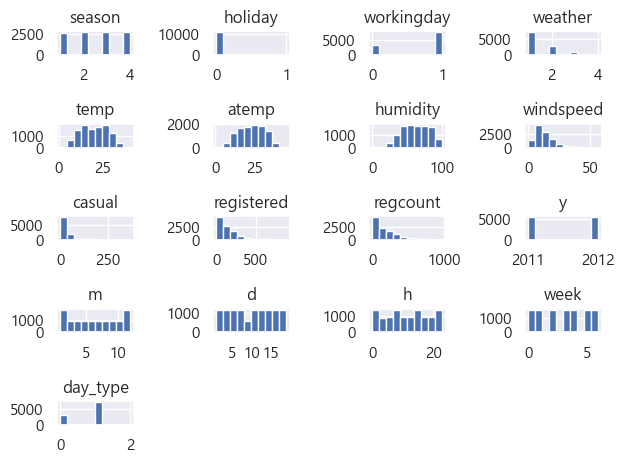

In [19]:
train.hist()
plt.tight_layout()
plt.show()

### Train, Test hist plot
* EDA에서 데이터 분포를 볼때는 train과 test를 함께 확인함.

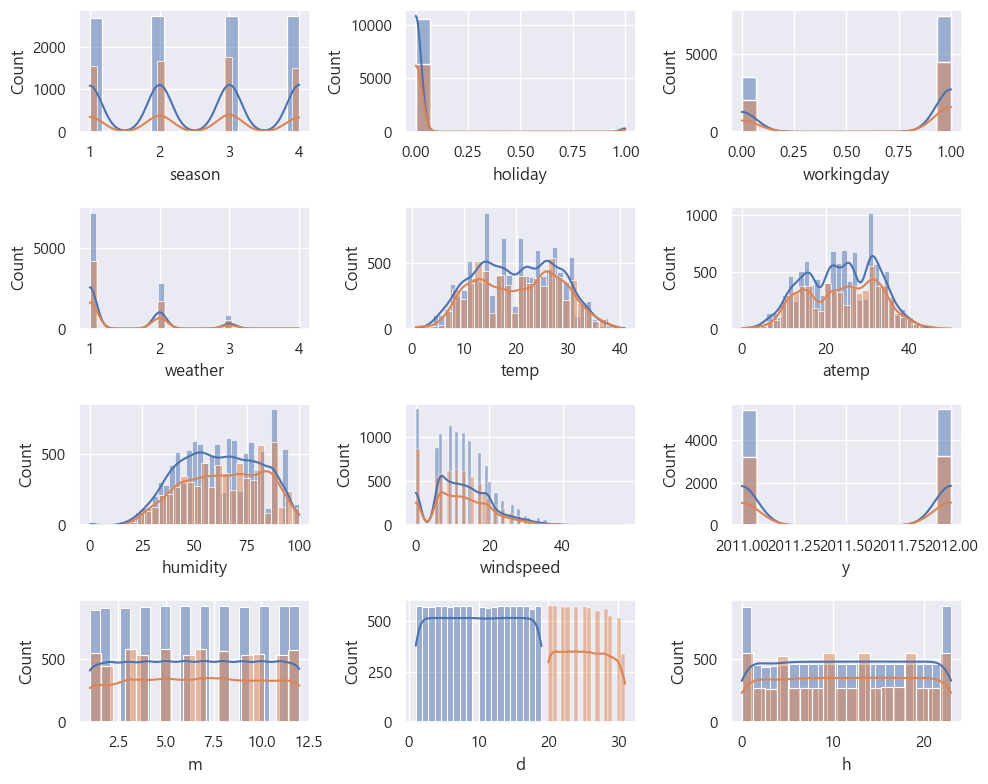

In [20]:
# Train와 Test 분포도를 함께 확인해 봤더니,  day정보는 양극화가 되어 있어서 해당 데이터는 사용하면 안될듯함.
col_list = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'windspeed', 'y', 'm', 'd', 'h']

fig, axes = plt.subplots(4,3, figsize=(10,8))
for i, col in enumerate(col_list):
    r = i//3
    c = i%3

    sns.histplot(data=train, x=col, kde=True, ax =axes[r][c])
    sns.histplot(data=test, x=col, kde=True, ax =axes[r][c])
    
plt.tight_layout()
plt.show()

### target (Casual, Registered, Regcount) hist plot

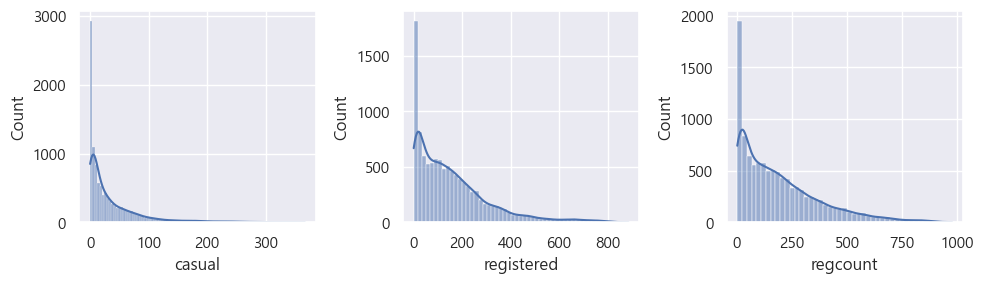

In [21]:
col_list = ['casual', 'registered', 'regcount']

fig, axes = plt.subplots(1,3, figsize=(10,3))

sns.histplot(data=train, x='casual', kde=True, ax =axes[0])
sns.histplot(data=train, x='registered', kde=True, ax =axes[1])
sns.histplot(data=train, x='regcount', kde=True, ax =axes[2])
    
plt.tight_layout()
plt.show()

## 연월일시

* countplot으로는 카테고리, 데이터별 개수가 균등하게 있는지 정도 확인
* barplot으로 target과 연관도가 있는지 확인

### 연월일시 bar plot

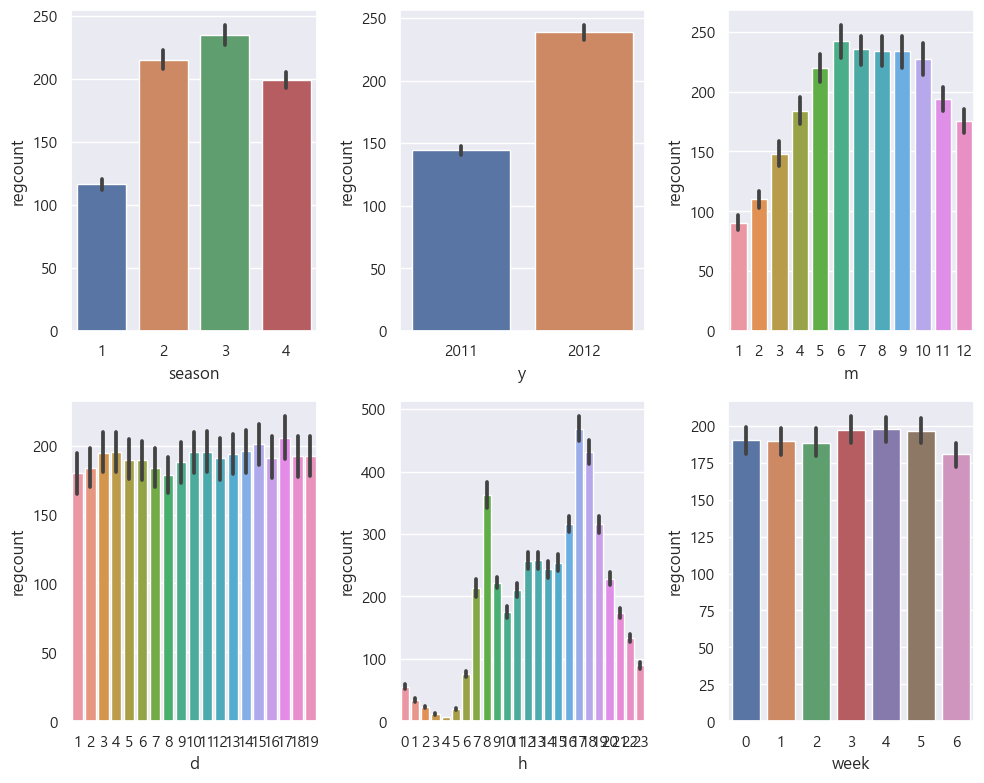

In [22]:
# 연월일시 bar plot
# train.groupby('season')['regcount'].mean()에 대한 그래프임.
plt.figure(figsize=(10,8))
col_list = ["season", 'y','m','d','h', 'week']

for i in range(len(col_list)):
    plt.subplot(2,3,i+1)
    sns.barplot(data=train, x=col_list[i], y='regcount')

plt.tight_layout()
plt.show()

### 연월일시 countplot

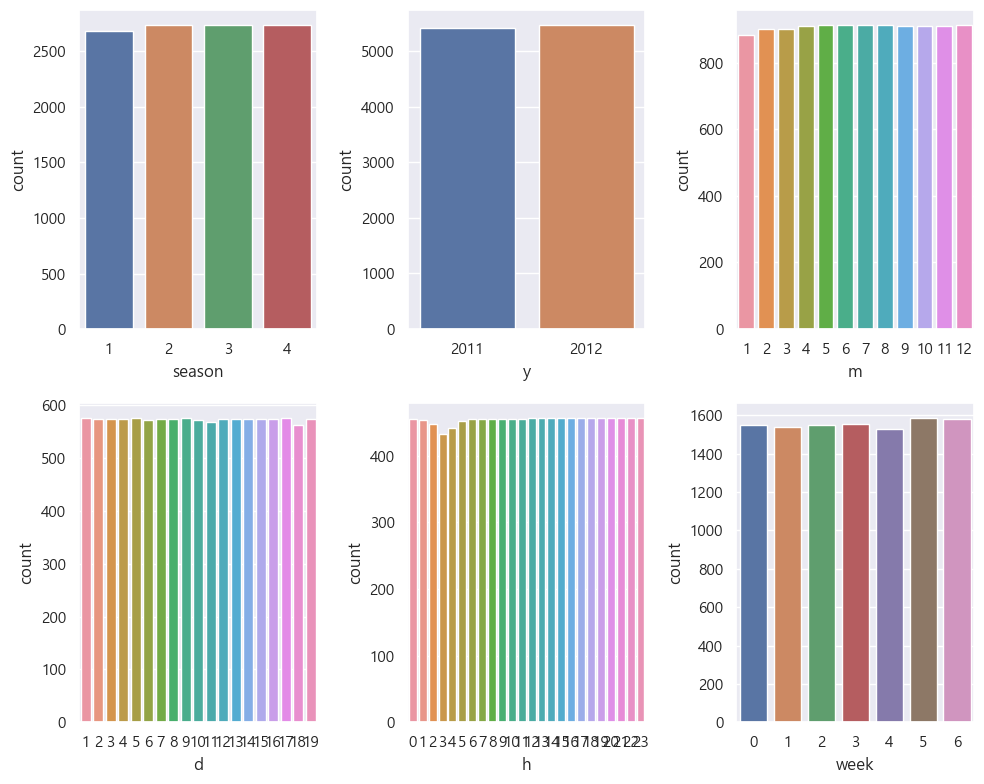

In [23]:
# train['season'].value_counts()에 대한 그래프임.
plt.figure(figsize=(10,8))
col_list = ["season", 'y','m','d','h', 'week']

for i in range(len(col_list)):
    plt.subplot(2,3,i+1)
    sns.countplot(data=train, x=col_list[i])

plt.tight_layout()
plt.show()

## holiday, workingday, day_type

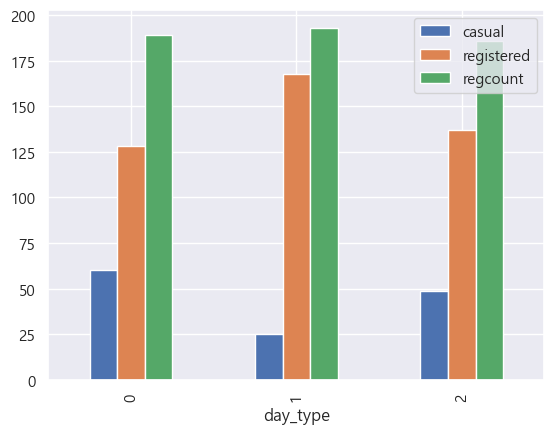

In [24]:
# 0: 주말, 1: 평일, 2: 공휴일
# 평일에는 예약이 많고, 휴일에는 현장방문이 많다.
# total regcount는 비슷함.

# working day 0에는 주말과 holiday가 포함임.

g = train.groupby('day_type')[['casual','registered','regcount']]
(g.sum()/g.count()).plot(kind='bar')
plt.show()

## h (시간대)

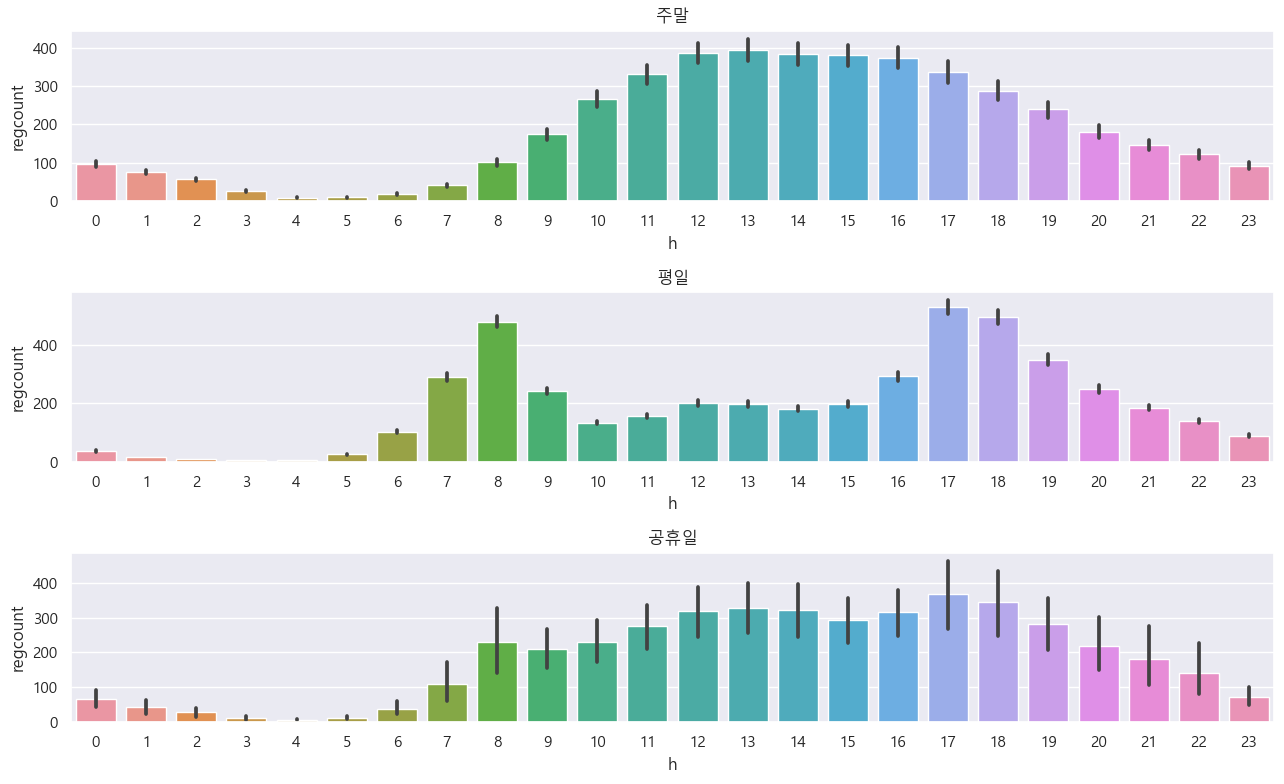

In [25]:
plt.figure(figsize=(13, 8))
plt.subplot(3,1,1)
plt.title("주말")
sns.barplot(data=train[train['day_type']==0], x='h', y='regcount', estimator='mean')
# sns.barplot(data=train[train['day_type']==0], x='h', y='registered', estimator='mean')
# sns.barplot(data=train[train['day_type']==0], x='h', y='casual', estimator='mean')
plt.subplot(3,1,2)
plt.title("평일")
sns.barplot(data=train[train['day_type']==1], x='h', y='regcount', estimator='mean')
plt.subplot(3,1,3)
plt.title("공휴일")
sns.barplot(data=train[train['day_type']==2], x='h', y='regcount', estimator='mean')
plt.tight_layout()
plt.show()

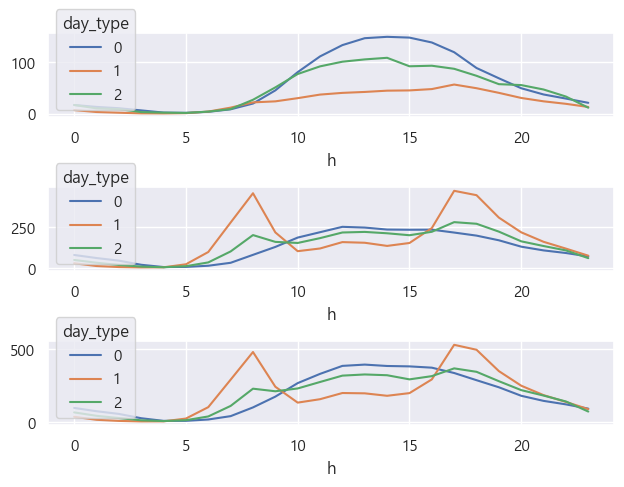

In [26]:
# 주말, 평일, 공휴일, pivot
ax1= plt.subplot(3,1, 1)
temp = train.pivot_table(index='h', columns='day_type', values = 'casual')
temp.plot(ax=ax1)
ax2 = plt.subplot(3,1,2)
temp = train.pivot_table(index='h', columns='day_type', values = 'registered')
temp.plot(ax=ax2)
ax3 = plt.subplot(3,1,3)
temp = train.pivot_table(index='h', columns='day_type', values = 'regcount')
temp.plot(ax=ax3)
plt.tight_layout()
plt.show()

## week (요일별)

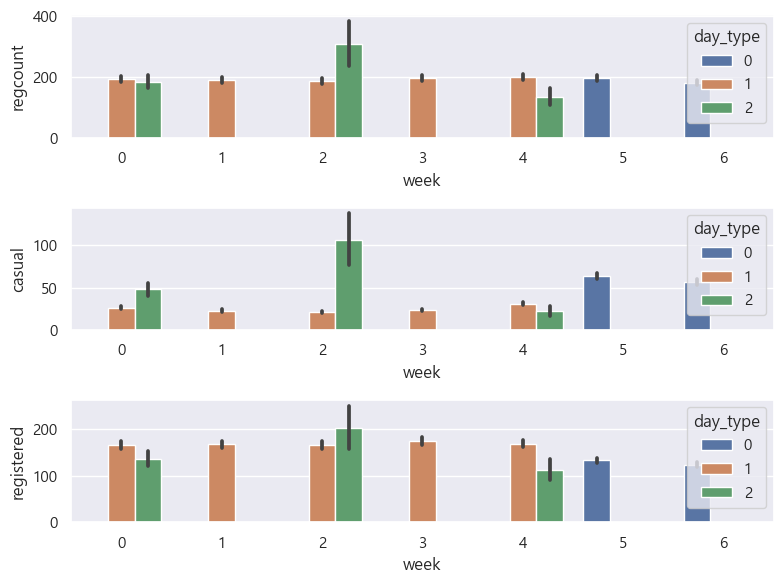

In [27]:
# 요일별 (주말, 평일, 공휴일 )
# 평일중, 월/수/금 요일에 공휴밀이 있으며, 그중 수요일 유독 대여량이 많다.
# 수요일 공휴일 select 해보면, data중 1일 밖에 없는데, 해당 1일치 예약건수가 많음!!
plt.figure(figsize=(8,6))
ax1= plt.subplot(3,1, 1)
sns.barplot(data=train, x='week', y='regcount', hue='day_type')
# sns.barplot(data=train, x='week', y='regcount', hue='day_type')

ax1= plt.subplot(3,1, 2)
sns.barplot(data=train, x='week', y='casual', hue='day_type')

ax1= plt.subplot(3,1, 3)
sns.barplot(data=train, x='week', y='registered', hue='day_type')
plt.tight_layout()
plt.show()

## m (월별)

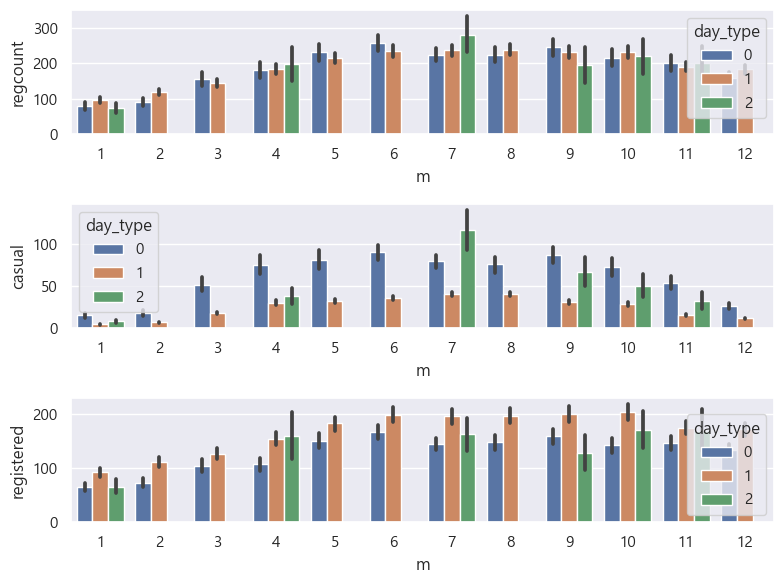

In [28]:
plt.figure(figsize=(8,6))
ax1= plt.subplot(3,1, 1)
sns.barplot(data=train, x='m', y='regcount', hue='day_type')
# sns.barplot(data=train, x='week', y='regcount', hue='day_type')

ax1= plt.subplot(3,1, 2)
sns.barplot(data=train, x='m', y='casual', hue='day_type')

ax1= plt.subplot(3,1, 3)
sns.barplot(data=train, x='m', y='registered', hue='day_type')
plt.tight_layout()
plt.show()

## 계절성
* 'season''weather', 'temp', 'atemp', 'humidity', 'windspeed',

### 시간별 temp와 regcount

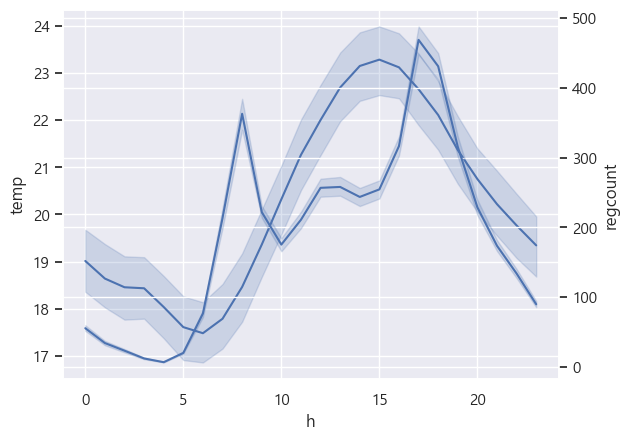

In [29]:
# 시간에 따른 temp의 변화는 존재하나, 
# 3시에서 5시경쯤, 온도와 대여수가 함께 올라가서, 영향이 있다고 봐야하는지
# 아님 그냥 영향이 적다고 봐야하는지...
fig, ax1 = plt.subplots()
sns.lineplot(data = train, x='h', y='temp', ax=ax1, estimator='mean')
ax2 = ax1.twinx()
sns.lineplot(data = train, x='h', y='regcount', ax=ax2)
plt.show()

### 시간별 humidity와 regcount

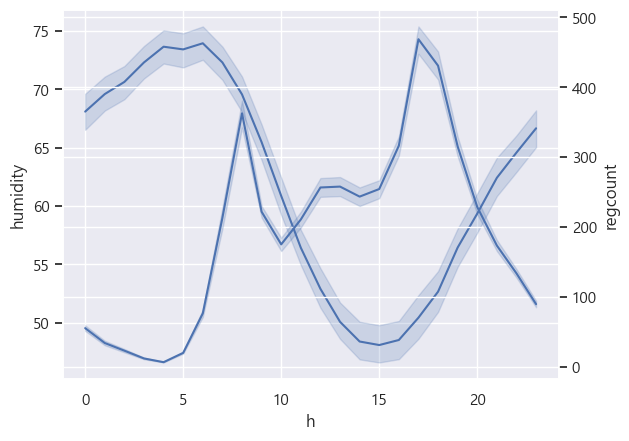

In [30]:
# 습도가 높으면 대여를 안함.
fig, ax1 = plt.subplots()
sns.lineplot(data = train, x='h', y='humidity', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data = train, x='h', y='regcount', ax=ax2)
plt.show()

### 시간별 windspeed와 regcount

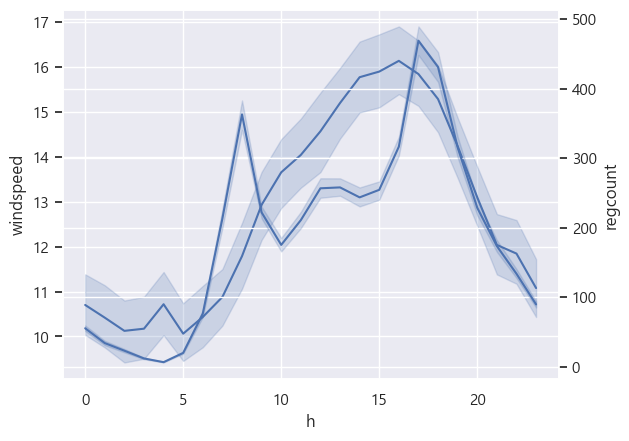

In [31]:
# 바람이 쎄면, 대여량이 높아짐.
fig, ax1 = plt.subplots()
sns.lineplot(data = train, x='h', y='windspeed', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data = train, x='h', y='regcount', ax=ax2)
plt.show()

### 월별 temp와 regcount

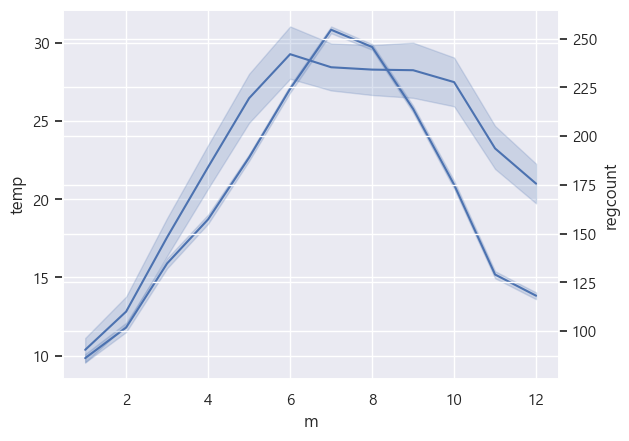

In [32]:
# 월별 온도와 대여량은 높은 연관성이 있음
fig, ax1 = plt.subplots()
sns.lineplot(data = train, x='m', y='temp', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data = train, x='m', y='regcount', ax=ax2)
plt.show()

### 월별 humidity와 regcount

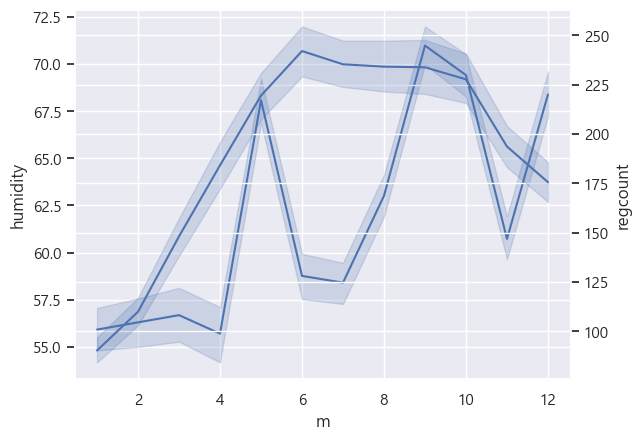

In [33]:
# 월별 습도와 대여량은 반대 관계가 있다고 함.... 
# 일부 구간에 대해서만 해당 관계가 성립함. 이 일부 구간은 다른 feature의 영향을 더 많이 받은듯
# 그러니까 일주 구간이라도 특징이 나타나면 영향이 있다고 보아도 될듯
fig, ax1 = plt.subplots()
sns.lineplot(data = train, x='m', y='humidity', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data = train, x='m', y='regcount', ax=ax2)
plt.show()

### 월별 windspeed와 regcount

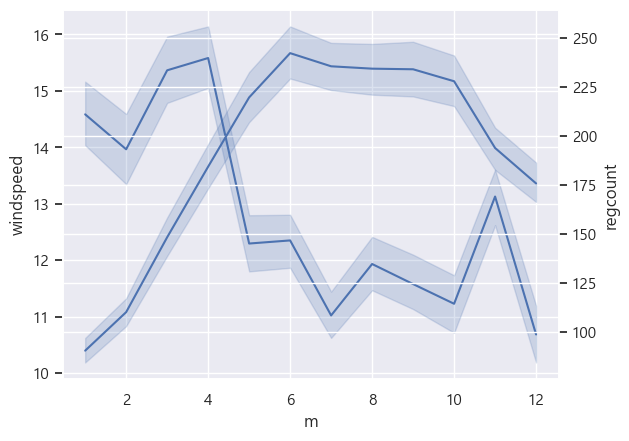

In [34]:
# 달별 바람세기와 대여량은 반대 관계가 성립함
fig, ax1 = plt.subplots()
sns.lineplot(data = train, x='m', y='windspeed', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data = train, x='m', y='regcount', ax=ax2)
plt.show()

### weather

<pre>
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog   

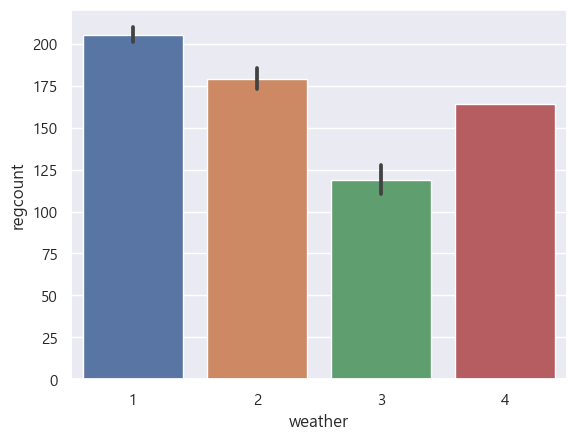

In [35]:
# 날씨가 맑아야!! 대여가 많다!!
sns.barplot(data = train, x='weather', y='regcount')
plt.show()

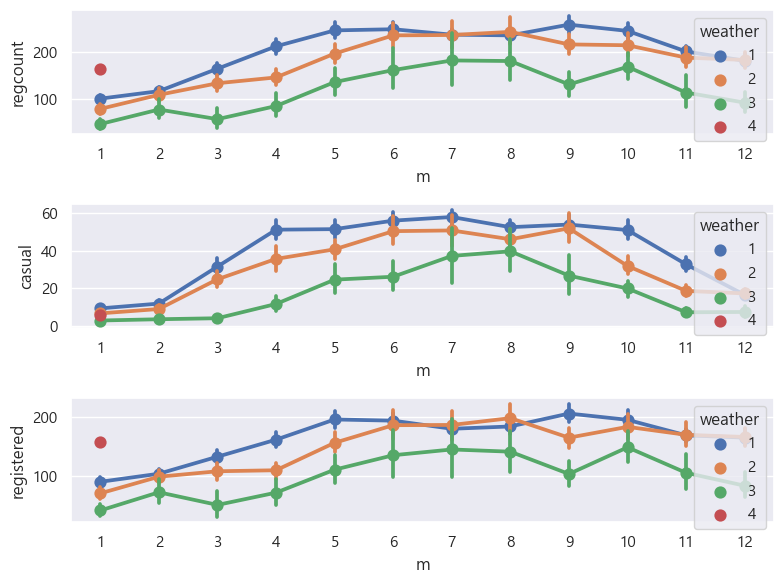

In [36]:
plt.figure(figsize=(8,6))
ax1= plt.subplot(3,1, 1)
sns.pointplot(data=train, x='m', y='regcount', hue='weather')
ax1= plt.subplot(3,1, 2)
sns.pointplot(data=train, x='m', y='casual', hue='weather')
ax1= plt.subplot(3,1, 3)
sns.pointplot(data=train, x='m', y='registered', hue='weather')
plt.tight_layout()
plt.show()

In [37]:
# 태풍 날씨에 대여한 건 1건. 근데 이 1건의 대여수가 큼. 
# 그래서 평균을 내면 태풍 날씨에도 대여건이 많은 것처럼 나옴.  --> outlier로 처리해야함.
train[train['weather']==4]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,regcount,y,m,d,h,week,day_type
regdate,,,,,,,,,,,,,,,,,
2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0,1


## 전체 feature에 대해서 outlier 체크

* 박스플롯으로 변수의 변별력을 확인할 때  
    분산, 퍼진 정도보다, 해당 feature에 대한 target값의 평균 변화정도를 확인한다.

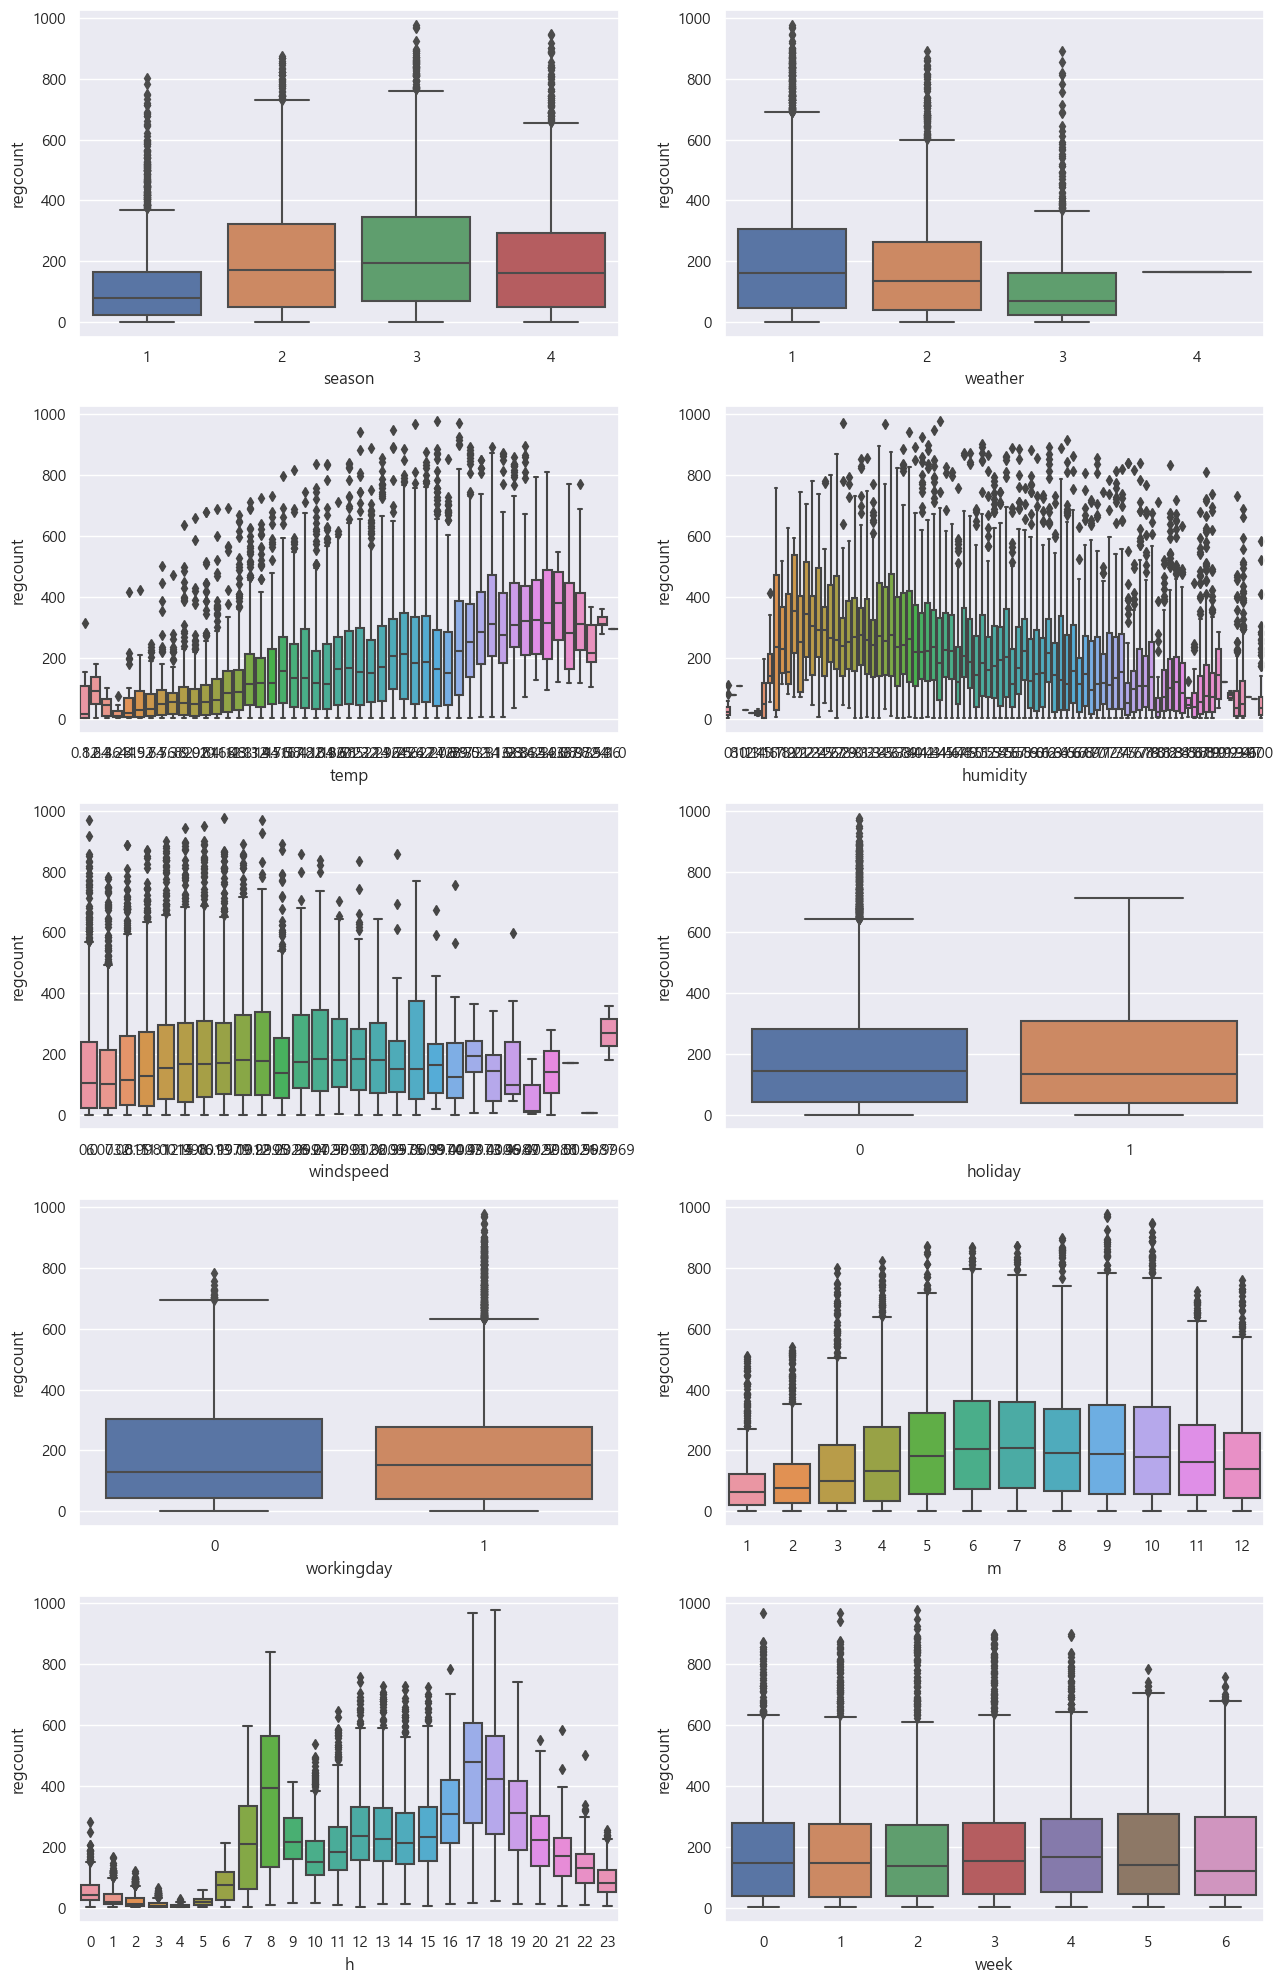

In [38]:
col_list =  ['season', 'weather', 'temp','humidity', 'windspeed', 'holiday', 'workingday', 'm','h', 'week']

plt.figure(figsize=(13,20))
for i in range(len(col_list)):
    plt.subplot(5,2, i+1)
    sns.boxplot(data = train, x = col_list[i], y = 'regcount')

# 'weather',  'temp', 'humidity',  'windspeed'
    
plt.tight_layout()
plt.show()

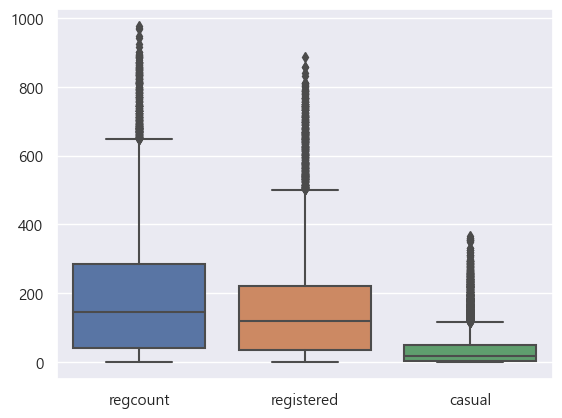

In [39]:
# Target Data 
sns.boxplot(train[['regcount','registered', 'casual']] )
plt.show()

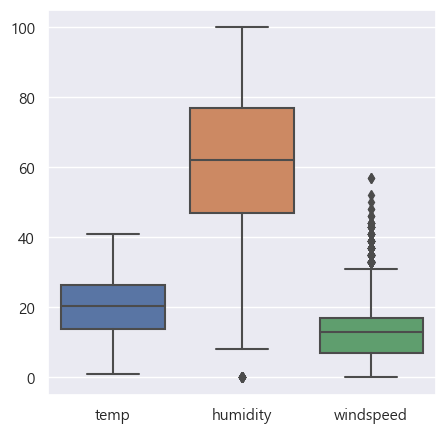

In [40]:
plt.figure(figsize=(5,5))
sns.boxplot(data = train[['temp','humidity', 'windspeed']])
plt.show()

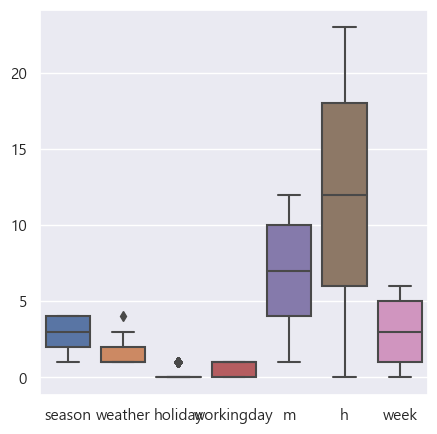

In [41]:
plt.figure(figsize=(5,5))
sns.boxplot(data = train[['season', 'weather','holiday', 'workingday', 'm','h', 'week']])
plt.show()

## Feature간 상관관계

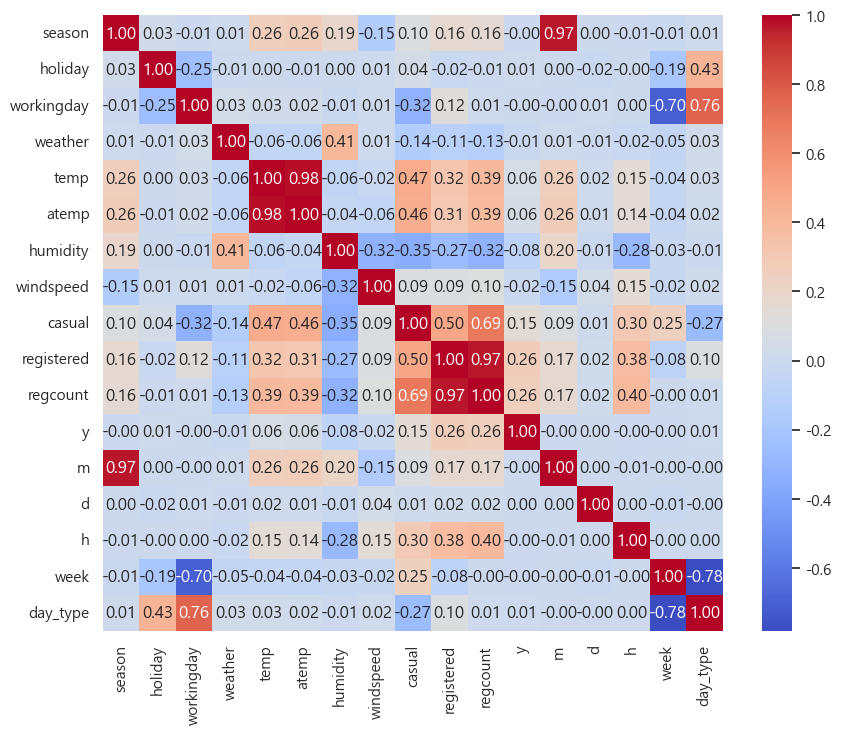

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

<AxesSubplot: >

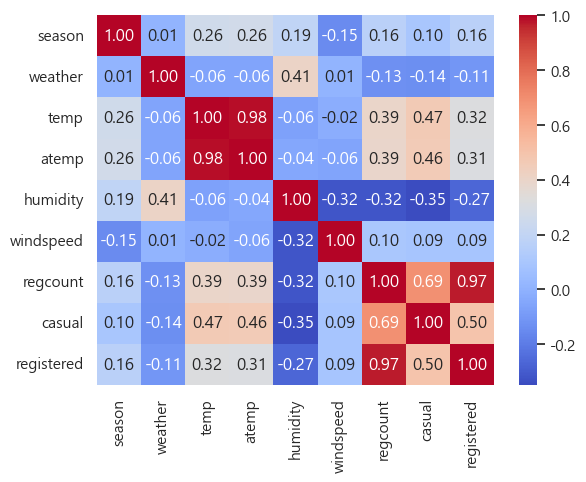

In [43]:
# temp와 atemp가 다중공선 관계  
# 두개 다 사용할 필요는 없어보임. 둘중에 하나를 선택한다면, 다른 컬럼이과 관계가 0.01정도 근소하게 더 높은 temp를 사용
# 다중공선인 경우, 둘다 넣어서 결과 보고, 둘중에 하나만 넣어서 결과 보고, 결과를 확인해야함.

temp = train[['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'regcount', 'casual', 'registered']]
sns.heatmap(temp.corr(), annot=True, fmt='.2f', cmap='coolwarm')

# 최종 Feature

*  target
    - regcount가 예측해야하는 값임.
    - 그러나 casual과 registered의 합산이 regcount이고, 
    - feature들에 대해서 casual과 registered의 특성이 다름.
    - 즉, casual과 registered를 각각 예측해서 해당 값의 합산을 결과로 제출한다.
        - regcount(A패턴) = registered(A2패턴) + casual(B패턴)
<pre>
타겟(1) : 'casual' + 'registered'
타겟(2) : 'regcount'

* Feature
<pre>  
    'd' 피쳐 삭제  
    ('m', 'h'),  'y', 'd' -->'w'  

    (+)3개 : 'holiday', 'workingday', 'day_type'  
    (+)2개 : 'holiday', 'workingday'  
    (+)1개 : 'day_type'  

    'weather', 'humidity',  'season',   
    (+)'windspeed' : 'h' 비례? / 'm' 반비례?  

* 다중공선 : 상관계수가 높은 경우
    * 이런 feature를 많이 넣으면 모델이 과대, 과소적합이 발생한다. 
    * 그래서 2개 feature가 다중공선관계일 경우, 1개만 선택햐아함.

<pre>
'regcount' 'registered' 'casual' : 0.97  --> 'regcount' vs. 'registered'+'casual'  
'temp' 'atemp'                   : 0.98  --> 'atemp' drop  

선택적으로 모델에 적용  
(+)'w' 'day_type' : -0.78  
(+)'season' 'm'   : 0.97  

* ('m', 'h'),  'y', 'w', 'weather', 'humidity',  'season', 'temp'
* (+)'windspeed'
* (+)('holiday', 'workingday'), ('day_type')
* (+)('w' 'day_type') : -0.78
* (+)('m') 'season'    : 0.97